Julian Francisco Pinchao Ortiz

C.C 1004579495

### Link a éste GitHub en classroom → ClassWork → Examenes

A)
1. Cree una función en Python que defina la función
$$
f(\lambda)=\int_0^\infty \frac{\sin(\lambda x)}{\operatorname{e}^x}\operatorname{d}x
$$
1. Gráfique dicha función para $\lambda$ entre 0 y 100
1. Haga un segundo gráfico añadiendo la derivada de la función

Sugerencia: Ignore los "WARNINGS" de Scipy



C:\Users\julip\AppData\Local\Temp/ipykernel_16044/2286477814.py:26: RuntimeWarning: overflow encountered in exp
  y=(integrate.quad(lambda x: np.sin(x*i)/np.exp(x),0,np.inf))[0]
C:\Users\julip\AppData\Local\Temp/ipykernel_16044/2286477814.py:26: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  y=(integrate.quad(lambda x: np.sin(x*i)/np.exp(x),0,np.inf))[0]
C:\Users\julip\AppData\Local\Temp/ipykernel_16044/2286477814.py:26: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  y=(integrate.quad(lambda x: np.sin(x*i)/np.exp(x),0,np.inf))[0]


Text(0.5, 0, '$\\lambda$')

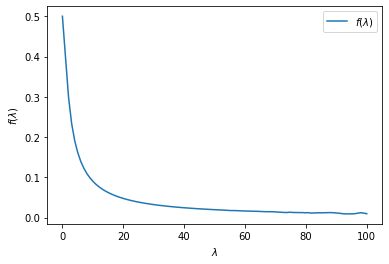

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy import misc
def derivate(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] # force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative
        
    return fp(func,x0,**kwargs)

l=np.linspace(0,100,100)
f=[]
for i in l:
    i=i+1    
    y=(integrate.quad(lambda x: np.sin(x*i)/np.exp(x),0,np.inf))[0]
    f.append(y)

fl=lambda s:integrate.quad(lambda x: np.sin(x*s)/np.exp(x),0,np.inf)[0]
plt.plot(l,f,label='$f(\lambda)$')
plt.legend()
plt.ylabel('$f(\lambda)$')
plt.xlabel('$\lambda$')

C:\Users\julip\AppData\Local\Temp/ipykernel_16044/365257916.py:29: RuntimeWarning: overflow encountered in exp
  fl=lambda s:integrate.quad(lambda x: np.sin(x*s)/np.exp(x),0,np.inf)[0]
C:\Users\julip\AppData\Local\Temp/ipykernel_16044/365257916.py:29: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  fl=lambda s:integrate.quad(lambda x: np.sin(x*s)/np.exp(x),0,np.inf)[0]
C:\Users\julip\AppData\Local\Temp/ipykernel_16044/365257916.py:29: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  fl=lambda s:integrate.quad(lambda x: np.sin(x*s)/np.exp(x),0,np.inf)[0

Text(0.5, 0, '$\\lambda$')

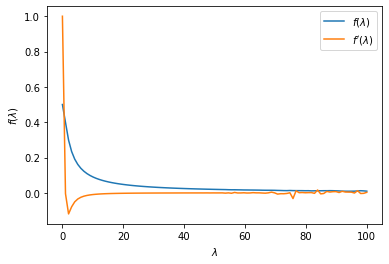

In [74]:
plt.plot(l,f,label='$f(\lambda)$')
plt.plot(l,derivate(fl,l,dx=1E-2),label="$f'(\lambda)$")
plt.legend()
plt.ylabel('$f(\lambda)$')
plt.xlabel('$\lambda$')

B)
Construya una matriz aleatoria $3\times 3$ $\boldsymbol{Y}$ y genere la matrix
$$
\boldsymbol{A}=\boldsymbol{Y}^{\operatorname{T}}\boldsymbol{Y}
$$

1. Obtenga los autovalores y autovectores de $\boldsymbol{A}$ en orden ascendente en valor absoluto
1. Compruebe que los atovalores de $\boldsymbol{Y}$ corresponden a la raíz cuadrada de los autovalores de  $\boldsymbol{A}$ y explique porqué

In [201]:
Y = np.array( [[ 5 ,-4, 2],
                [-4 , 7,-3],
                [ 0 ,-3, 3]] )

In [202]:
A=Y.T@Y
autovaloresA=np.linalg.eig(A)
print(f'Autovalores en orden ascendente{np.abs(np.sort(autovaloresA[0]))}' )
print(f'Autovectores en orden ascedente en valor absoluto: {np.abs(np.sort(autovaloresA[1]))}')

Autovalores en orden ascendente[  1.09539931   9.34867479 126.5559259 ]
Autovectores en orden ascedente en valor absoluto: [[0.80449397 0.27802962 0.52487045]
 [0.75855973 0.2939217  0.58154722]
 [0.38613229 0.51613903 0.76452754]]


In [203]:
autovaloresV=np.linalg.eig(Y)[0]
print(np.sort(autovaloresV))

[ 1.24881636  2.5806569  11.17052674]


2. Compruebe que los atovalores de $\boldsymbol{Y}$ corresponden a la raíz cuadrada de los autovalores de  $\boldsymbol{A}$ y explique porqué

In [204]:
np.round(np.sort(np.sqrt(autovaloresA[0])))==np.round(np.sort(autovaloresV))


array([ True,  True,  True])

El enunciado es verdadero, ya que si calculamos la raiz del determinante de A, nos da el determinante de Y
$$
\sqrt{det(A)}=det(\boldsymbol{Y})
$$


In [205]:
np.round(np.sqrt(np.linalg.det(A)),2)==np.round(np.linalg.det(Y),2)

True

O tambien si obtenemos el determinante de $\boldsymbol{Y}^{\operatorname{T}}\boldsymbol{Y}$ nos da el determinate de $\boldsymbol{A}$
$$
det(\boldsymbol{A}=det(\boldsymbol{Y}^{\operatorname{T}}\boldsymbol{Y})
$$

In [214]:
np.round(np.linalg.det(Y.T@Y),2)==np.round(np.linalg.det(A))

True